In [1]:
from glob import glob
from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [2]:
filelist=glob("./weights*/*.csv")

In [3]:
filelist

['.\\weights\\fold_10_w_128_fs_28.csv',
 '.\\weights\\fold_10_w_128_fs_38.csv',
 '.\\weights\\fold_10_w_128_fs_48.csv',
 '.\\weights\\fold_10_w_32_fs_28.csv',
 '.\\weights\\fold_10_w_32_fs_38.csv',
 '.\\weights\\fold_10_w_32_fs_48.csv',
 '.\\weights\\fold_10_w_64_fs_28.csv',
 '.\\weights\\fold_10_w_64_fs_38.csv',
 '.\\weights\\fold_10_w_64_fs_48.csv',
 '.\\weights\\fold_1_w_128_fs_28.csv',
 '.\\weights\\fold_1_w_128_fs_38.csv',
 '.\\weights\\fold_1_w_128_fs_48.csv',
 '.\\weights\\fold_1_w_32_fs_28.csv',
 '.\\weights\\fold_1_w_32_fs_38.csv',
 '.\\weights\\fold_1_w_32_fs_48.csv',
 '.\\weights\\fold_1_w_64_fs_28.csv',
 '.\\weights\\fold_1_w_64_fs_38.csv',
 '.\\weights\\fold_1_w_64_fs_48.csv',
 '.\\weights\\fold_2_w_128_fs_28.csv',
 '.\\weights\\fold_2_w_128_fs_38.csv',
 '.\\weights\\fold_2_w_128_fs_48.csv',
 '.\\weights\\fold_2_w_32_fs_28.csv',
 '.\\weights\\fold_2_w_32_fs_38.csv',
 '.\\weights\\fold_2_w_32_fs_48.csv',
 '.\\weights\\fold_2_w_64_fs_28.csv',
 '.\\weights\\fold_2_w_64_fs_38.

In [4]:
conv1_list=[i for i in filelist if i.split('\\')[-1][0:4]=='new1']
print(len(conv1_list))
conv2_list=[i for i in filelist if i.split('\\')[-1][0:4]=='new2']
print(len(conv2_list))
filelist=list(set(filelist)-set(conv1_list)-set(conv2_list))
len(filelist)

20
10


90

In [5]:
tmp=pd.read_table(r'.\weights\fold_4_w_64_fs_38.csv',sep=',')#['label']
tmprob,tmplabel=tmp['prob'],tmp['label']
tmp['pred']=1
tmp['pred'][tmp['prob']>=0.5]=1
tmp['pred'][tmp['prob']<0.5]=0
sum(tmp['pred']==tmplabel)/len(tmplabel),(0.933+0.768+0.74+0.806)/4

(0.9204983684366657, 0.81175)

In [6]:
#click twice
for fs in ['28','38','48']:
    for w in ['32','64','128']:
        fs_28=[file for file in filelist if file.split('_')[-1]=='%s.csv'%(fs)]
        weight_32_fs_38=[file for file in fs_28 if file.split('_')[-3]=='%s'%(w)]
        num=0
        total=0
        tmp=0
        for filename in weight_32_fs_38:
            file=pd.read_table(filename,sep=',')
            prob,label=file['prob'],file['label']
            file['pred']=1
            file['pred'][file['prob']>=0.5]=1
            file['pred'][file['prob']<0.5]=0
            num=num+sum(file.pred==label)
            total+=len(label)
            tmp+=sum(file.pred==label)/len(label)
            #print(sum(file.pred==label)/len(label),filename)
        print(fs,w,'|||',num/total,tmp/10)

for fs in ['38']:
    for w in ['64','128']:
        fs_28=[file for file in conv1_list if file.split('_')[-1]=='%s.csv'%(fs)]
        weight_32_fs_38=[file for file in fs_28 if file.split('_')[-3]=='%s'%(w)]
        num=0
        total=0
        tmp=0
        for filename in weight_32_fs_38:
            file=pd.read_table(filename,sep=',')
            prob,label=file['prob'],file['label']
            file['pred']=1
            file['pred'][file['prob']>=0.5]=1
            file['pred'][file['prob']<0.5]=0
            num=num+sum(file.pred==label)
            total+=len(label)
            tmp+=sum(file.pred==label)/len(label)
            #print(sum(file.pred==label)/len(label),filename)
        print(fs,w,'|||',num/total,tmp/10)

28 32 ||| 0.8520263901979265 0.8524136283196271
28 64 ||| 0.8545194734121796 0.855500597265541
28 128 ||| 0.861907512693442 0.862862914823982
38 32 ||| 0.8573773980724211 0.8577317706631021
38 64 ||| 0.8557660150193062 0.8566354680303977
38 128 ||| 0.861390653978292 0.8621055731433473
48 32 ||| 0.8566781186342769 0.8571097863644758
48 64 ||| 0.8612994436167949 0.861789844901276
48 128 ||| 0.8585935362257152 0.859272145428063
38 64 ||| 0.8571037669879298 0.8576999919962539
38 128 ||| 0.85917120184853 0.8596062215090547


['.\\weights\\fold_9_w_32_fs_28.csv', '.\\weights\\fold_5_w_32_fs_28.csv', '.\\weights\\fold_4_w_32_fs_28.csv', '.\\weights\\fold_2_w_32_fs_28.csv', '.\\weights\\fold_10_w_32_fs_28.csv', '.\\weights\\fold_7_w_32_fs_28.csv', '.\\weights\\fold_8_w_32_fs_28.csv', '.\\weights\\fold_1_w_32_fs_28.csv', '.\\weights\\fold_6_w_32_fs_28.csv', '.\\weights\\fold_3_w_32_fs_28.csv']
28 32 ||| 0.8520263901979265 0.8524136283196271
['.\\weights\\fold_7_w_64_fs_28.csv', '.\\weights\\fold_1_w_64_fs_28.csv', '.\\weights\\fold_3_w_64_fs_28.csv', '.\\weights\\fold_6_w_64_fs_28.csv', '.\\weights\\fold_4_w_64_fs_28.csv', '.\\weights\\fold_5_w_64_fs_28.csv', '.\\weights\\fold_10_w_64_fs_28.csv', '.\\weights\\fold_2_w_64_fs_28.csv', '.\\weights\\fold_9_w_64_fs_28.csv', '.\\weights\\fold_8_w_64_fs_28.csv']
28 64 ||| 0.8545194734121796 0.855500597265541
['.\\weights\\fold_8_w_128_fs_28.csv', '.\\weights\\fold_7_w_128_fs_28.csv', '.\\weights\\fold_10_w_128_fs_28.csv', '.\\weights\\fold_6_w_128_fs_28.csv', '.\\wei

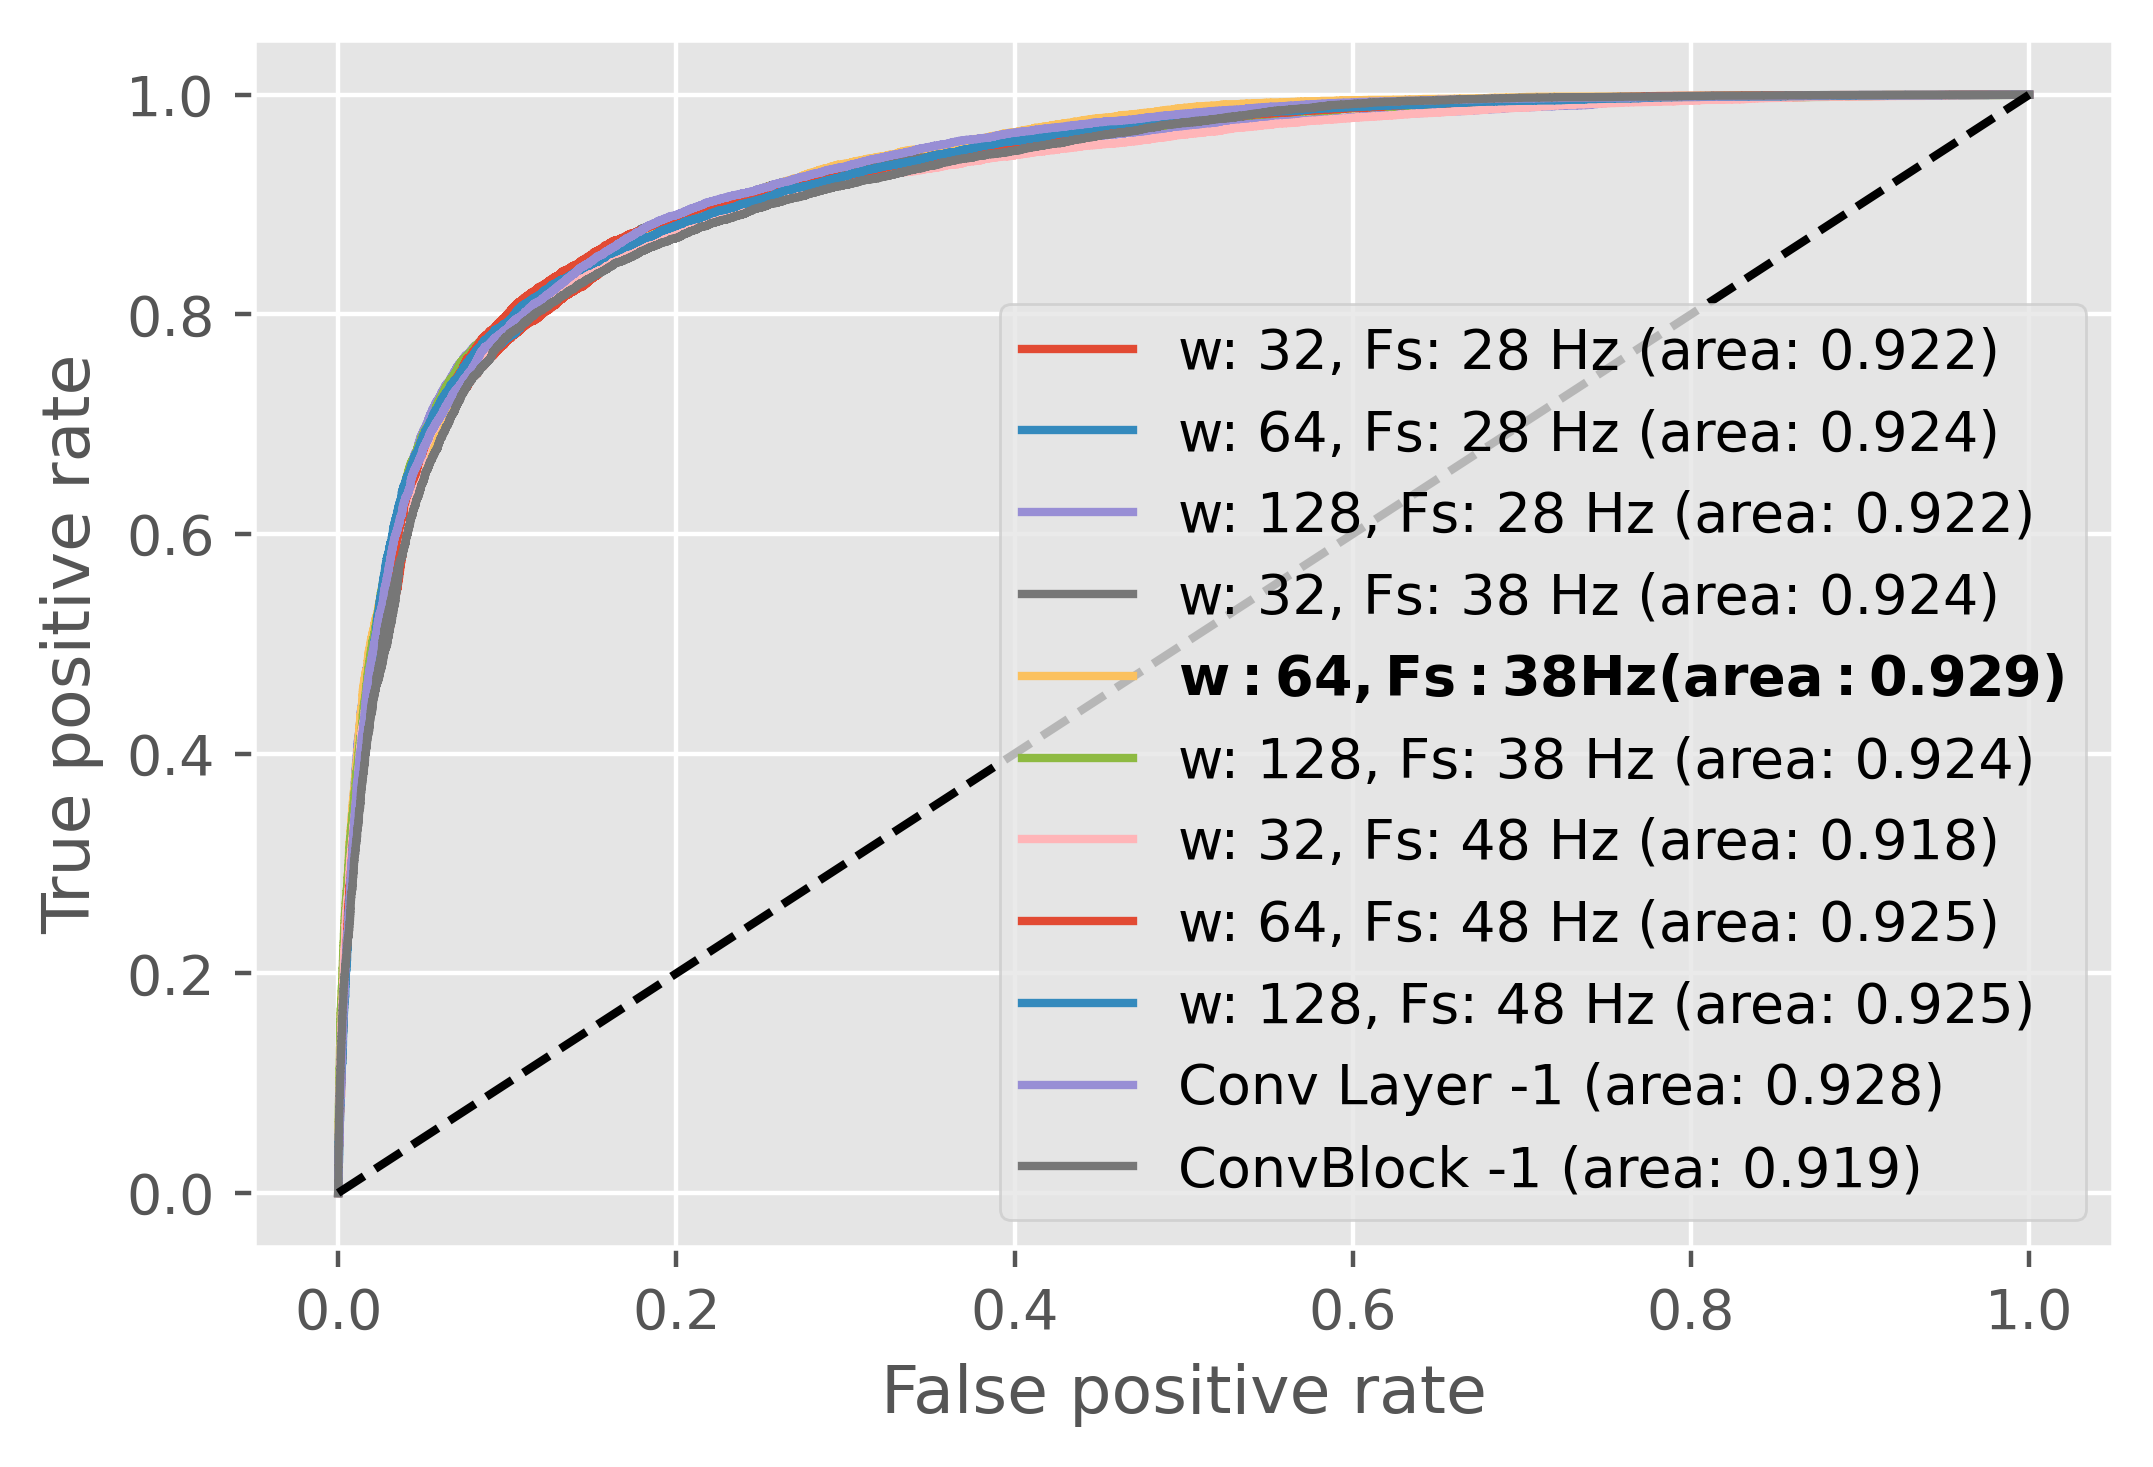

In [7]:
plt.figure(dpi=400)
font1={'style':'normal','weight':'bold'}
font={'style':'normal','weight':'normal'}
for fs in ['28','38','48']:
    for w in ['32','64','128']:
        fs_28=[file for file in filelist if file.split('_')[-1]=='%s.csv'%(fs)]
        weight_32_fs_38=[file for file in fs_28 if file.split('_')[-3]=='%s'%(w)]
        print(weight_32_fs_38)
        num=0
        total=0
        tmp=0
        df=pd.DataFrame({'pred':[],'label':[],'seg':[]})
        for filename in weight_32_fs_38:
            file=pd.read_table(filename,sep=',')
            df=pd.concat((df,file))
            prob,label=file['prob'],file['label']
            file['pred']=1
            file['pred'][file['prob']>=0.5]=1
            file['pred'][file['prob']<0.5]=0
            num=num+sum(file.pred==label)
            total+=len(label)
            tmp+=sum(file.pred==label)/len(label)
            #print(sum(file.pred==label)/len(label),filename)
            
        print(fs,w,'|||',num/total,tmp/10)
        df['pred']=1
        df['pred'][df['prob']>=0.5]=1
        df['pred'][df['prob']<0.5]=0
        fpr,tpr,thres=roc_curve(df.label,df.prob)
        score=roc_auc_score(df.label,df.prob)
        if w=='64' and fs=='38':
            plt.plot(fpr,tpr,label=r'$\mathbf{w: %s, Fs: %s Hz (area: %.3f)}$'%(w,fs,score))
        else:
            plt.plot(fpr,tpr,label=r'w: %s, Fs: %s Hz (area: %.3f)'%(w,fs,score))

for fs in ['38']:
    for w in ['64']:
        fs_28=[file for file in conv1_list if file.split('_')[-1]=='%s.csv'%(fs)]
        weight_32_fs_38=[file for file in fs_28 if file.split('_')[-3]=='%s'%(w)]
        print(weight_32_fs_38)
        num=0
        total=0
        tmp=0
        df=pd.DataFrame({'pred':[],'label':[],'seg':[]})
        for filename in weight_32_fs_38:
            file=pd.read_table(filename,sep=',')
            df=pd.concat((df,file))
            prob,label=file['prob'],file['label']
            file['pred']=1
            file['pred'][file['prob']>=0.5]=1
            file['pred'][file['prob']<0.5]=0
            num=num+sum(file.pred==label)
            total+=len(label)
            tmp+=sum(file.pred==label)/len(label)
            #print(sum(file.pred==label)/len(label),filename)
            
        print(fs,w,'|||',num/total,tmp/10)
        df['pred']=1
        df['pred'][df['prob']>=0.5]=1
        df['pred'][df['prob']<0.5]=0
        fpr,tpr,thres=roc_curve(df.label,df.prob)
        score=roc_auc_score(df.label,df.prob)

        plt.plot(fpr,tpr,label=r'Conv Layer -1 (area: %.3f)'%(score))

for fs in ['38']:
    for w in ['64']:
        fs_28=[file for file in conv2_list if file.split('_')[-1]=='%s.csv'%(fs)]
        weight_32_fs_38=[file for file in fs_28 if file.split('_')[-3]=='%s'%(w)]
        print(weight_32_fs_38)
        num=0
        total=0
        tmp=0
        df=pd.DataFrame({'pred':[],'label':[],'seg':[]})
        for filename in weight_32_fs_38:
            file=pd.read_table(filename,sep=',')
            df=pd.concat((df,file))
            prob,label=file['prob'],file['label']
            file['pred']=1
            file['pred'][file['prob']>=0.5]=1
            file['pred'][file['prob']<0.5]=0
            num=num+sum(file.pred==label)
            total+=len(label)
            tmp+=sum(file.pred==label)/len(label)
            #print(sum(file.pred==label)/len(label),filename)
            
        print(fs,w,'|||',num/total,tmp/10)
        df['pred']=1
        df['pred'][df['prob']>=0.5]=1
        df['pred'][df['prob']<0.5]=0
        fpr,tpr,thres=roc_curve(df.label,df.prob)
        score=roc_auc_score(df.label,df.prob)

        plt.plot(fpr,tpr,label=r'ConvBlock -1 (area: %.3f)'%(score))
            
            
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(prop=font)
plt.savefig('auc.svg')
plt.show()
plt.close("all")